[-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408 -2.3877551
 -2.26530612 -2.14285714 -2.02040816 -1.89795918 -1.7755102  -1.65306122
 -1.53061224 -1.40816327 -1.28571429 -1.16326531 -1.04081633 -0.91836735
 -0.79591837 -0.67346939 -0.55102041 -0.42857143 -0.30612245 -0.18367347
 -0.06122449  0.06122449  0.18367347  0.30612245  0.42857143  0.55102041
  0.67346939  0.79591837  0.91836735  1.04081633  1.16326531  1.28571429
  1.40816327  1.53061224  1.65306122  1.7755102   1.89795918  2.02040816
  2.14285714  2.26530612  2.3877551   2.51020408  2.63265306  2.75510204
  2.87755102  3.        ]
[[1.         0.47251413 0.04984932 ... 0.         0.         0.        ]
 [0.47251413 1.         0.47251413 ... 0.         0.         0.        ]
 [0.04984932 0.47251413 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.47251413 0.04984932]
 [0.         0.         0.         ... 0.47251413 1.         0.47251413]
 [0.         0.      

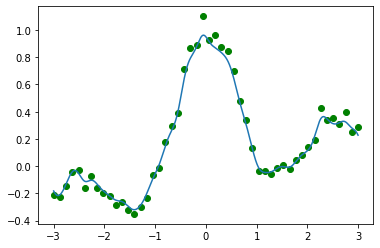

In [ ]:
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(0)  # set the random seed for reproducibility


def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    noise = 0.05 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise


def calc_design_matrix(x, c, h):
    return np.exp(-(x[None] - c[:, None]) ** 2 / (2 * h ** 2))


# create sample
sample_size = 50
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)


# calculate design matrix
h = 0.1
k = calc_design_matrix(x, x, h)

# solve the least square problem
l = 0.3
theta = np.linalg.solve(
    k.T.dot(k) + l * np.identity(len(k)),
    k.T.dot(y[:, None]))

# create data to visualize the prediction
X = np.linspace(start=xmin, stop=xmax, num=5000)
K = calc_design_matrix(x, X, h)
#print(np.shape(K))
prediction = K.dot(theta)

# visualization
plt.clf()
plt.scatter(x, y, c='green', marker='o')
plt.plot(X, prediction)
plt.savefig('lecture2-p43.png')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


0.7000000000000001 0.4


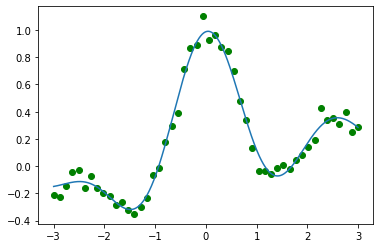

In [ ]:
#kadai2-1
#
#
#

from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(0)  # set the random seed for reproducibility


def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    noise = 0.05 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise


def calc_design_matrix(x, c, h):
    return np.exp(-(x[None] - c[:, None]) ** 2 / (2 * h ** 2))


# create sample
sample_size = 50
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)

opt_h = 0
opt_l = 0
min_loss = 1000000

# calculate design matrix
for hi in range(0,11):
    h = 0.1*hi
    for li in range(0,11):
        # solve the least square problem
        l = 0.1*li
        sum_loss = 0
        for i in range(np.size(x)):
            x_rmv_i = np.delete(x, i, 0)
            y_rmv_i = np.delete(y, i, 0)
            xi = x[i]
            yi = y[i]
            k = calc_design_matrix(x_rmv_i, x_rmv_i, h)
            theta = np.linalg.solve(
                k.T.dot(k) + l * np.identity(len(k)),
                k.T.dot(y_rmv_i[:, None]))
            K = calc_design_matrix(x_rmv_i, xi[None], h)
            sum_loss += (yi - K.dot(theta))**2
            #print(loss)
        if (sum_loss/np.size(x) < min_loss):
            min_loss = sum_loss/np.size(x)
            opt_h = h
            opt_l = l






print("h=", opt_h, "l=", opt_l, "loss=", min_loss)    

# create data to visualize the prediction
X = np.linspace(start=xmin, stop=xmax, num=5000)
opt_K = calc_design_matrix(x, X, opt_h)
prediction = K.dot(theta)

# visualization
plt.clf()
plt.scatter(x, y, c='green', marker='o')
plt.plot(X, prediction)
plt.savefig('lecture2-opt.png')

#----------

# calculate design matrix
h = opt_h
k = calc_design_matrix(x, x, h)

# solve the least square problem
l = opt_l
theta = np.linalg.solve(
    k.T.dot(k) + l * np.identity(len(k)),
    k.T.dot(y[:, None]))

# create data to visualize the prediction
X = np.linspace(start=xmin, stop=xmax, num=5000)
K = calc_design_matrix(x, X, h)
#print(np.shape(K))
prediction = K.dot(theta)

# visualization
plt.clf()
plt.scatter(x, y, c='green', marker='o')
plt.plot(X, prediction)
plt.savefig('lecture2-optfull.png')


./  ../  .config/  lecture2-p43.png  sample_data/


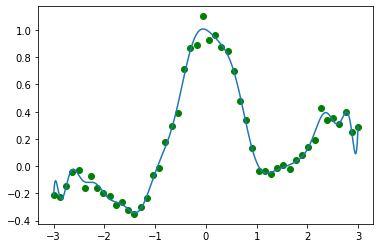

In [ ]:
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(0)  # set the random seed for reproducibility


def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    noise = 0.05 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise


def calc_design_matrix(x):
    sample_size = len(x)
    phi = np.empty(shape=(sample_size, 31))  # design matrix
    phi[:, 0] = 1.
    phi[:, 1::2] = np.sin(x[:, None] * np.arange(1, 16)[None] / 2)
    phi[:, 2::2] = np.cos(x[:, None] * np.arange(1, 16)[None] / 2)
    return phi


# create sample
sample_size = 50
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)

# calculate design matrix
phi = calc_design_matrix(x)

# solve the least square problem
theta = np.linalg.solve(phi.T.dot(phi), phi.T.dot(y[:, None]))

# create data to visualize the prediction
X = np.linspace(start=xmin, stop=xmax, num=5000)
Phi = calc_design_matrix(X)
prediction = Phi.dot(theta)

# visualization
plt.clf()
plt.scatter(x, y, c='green', marker='o')
plt.plot(X, prediction)
plt.savefig('lecture2-p28.png')


In [ ]:
#kadai2-1
#
#
#

from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(0)  # set the random seed for reproducibility


def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    noise = 0.05 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise


def calc_design_matrix(x, c, h):
    return np.exp(-(x[None] - c[:, None]) ** 2 / (2 * h ** 2))


# create sample
sample_size = 50
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)

opt_h = 0
opt_l = 0
min_loss = 1000000

# calculate design matrix
for hi in range(0,11):
    h = 0.1*hi
    for li in range(0,11):
        l = 0.1*li
        sum_loss = 0
        for i in range(np.size(x)):
            x_rmv_i = np.delete(x, i, 0)
            y_rmv_i = np.delete(y, i, 0)
            xi = x[i]
            yi = y[i]
            k = calc_design_matrix(x_rmv_i, x_rmv_i, h)
            # solve the least square problem
            theta = np.linalg.solve(
                k.T.dot(k) + l * np.identity(len(k)),
                k.T.dot(y_rmv_i[:, None]))
            K = calc_design_matrix(x_rmv_i, xi[None], h)
            sum_loss += (yi - K.dot(theta))**2
        if (sum_loss/np.size(x) < min_loss):
            min_loss = sum_loss/np.size(x)
            opt_h = h
            opt_l = l

print("h=", opt_h, "l=", opt_l, "loss=", min_loss)    

In [ ]:
#kadai2-1
#
#
#

from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(0)  # set the random seed for reproducibility


def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    noise = 0.05 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise


def calc_design_matrix(x, c, h):
    return np.exp(-(x[None] - c[:, None]) ** 2 / (2 * h ** 2))


# create sample
sample_size = 50
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)

opt_h = 0
opt_l = 0
min_loss = 1000000

# calculate design matrix
for hi in range(1,40):
    h = 0.05 * hi #hの値を操作
    for li in range(40):
        l = 0.05 * li #lamdaの値を操作
        sum_loss = 0
        #h,lを固定してデータからひとつ取り除いて学習させる
        for i in range(np.size(x)):
            x_rmv_i = np.delete(x, i, 0) #学習用
            y_rmv_i = np.delete(y, i, 0) #学習用
            xi = x[i] #検証用
            yi = y[i] #検証用
            k = calc_design_matrix(x_rmv_i, x_rmv_i, h)
            # solve the least square problem
            theta = np.linalg.solve(
                k.T.dot(k) + l * np.identity(len(k)),
                k.T.dot(y_rmv_i[:, None]))
            K = calc_design_matrix(x_rmv_i, xi[None], h)
            sum_loss += (yi - K.dot(theta))**2 
        #print(h, l, sum_loss/np.size(x), min_loss)
        if (sum_loss/np.size(x) < min_loss): #loss(検証データの2乗誤差)の平均が最小になるh,lを求める
            min_loss = sum_loss/np.size(x)
            opt_h = h
            opt_l = l

print("h=", opt_h, "l=", opt_l, "valid_loss=", min_loss)  

h= 0.30000000000000004 l= 0.05 valid_loss= [[0.00363321]]


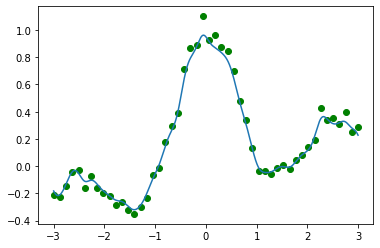

In [ ]:
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(0)  # set the random seed for reproducibility


def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    noise = 0.05 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise


def calc_design_matrix(x, c, h):
    return np.exp(-(x[None] - c[:, None]) ** 2 / (2 * h ** 2))


# create sample
sample_size = 50
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)


# calculate design matrix
h = 0.1
k = calc_design_matrix(x, x, h)

# solve the least square problem
l = 0.3
theta = np.linalg.solve(
    k.T.dot(k) + l * np.identity(len(k)),
    k.T.dot(y[:, None]))

# create data to visualize the prediction
X = np.linspace(start=xmin, stop=xmax, num=5000)
K = calc_design_matrix(x, X, h)
#print(np.shape(K))
prediction = K.dot(theta)

# visualization
plt.clf()
plt.scatter(x, y, c='green', marker='o')
plt.plot(X, prediction)
plt.savefig('lecture2-default.png')



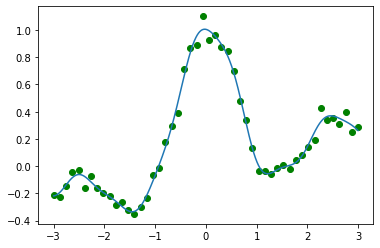

In [ ]:
#-------------------------------------

# calculate design matrix
h = 0.3
k = calc_design_matrix(x, x, h)

# solve the least square problem
l = 0.05
theta = np.linalg.solve(
    k.T.dot(k) + l * np.identity(len(k)),
    k.T.dot(y[:, None]))

# create data to visualize the prediction
X = np.linspace(start=xmin, stop=xmax, num=5000)
K = calc_design_matrix(x, X, h)
#print(np.shape(K))
prediction = K.dot(theta)

# visualization
plt.clf()
plt.scatter(x, y, c='green', marker='o')
plt.plot(X, prediction)
plt.savefig('lecture2-opt.png')